In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
# for path
import os
dirs = os.listdir('../DBSCAN/')
for x in dirs:
    print (x)

SyntaxError: invalid syntax (<ipython-input-2-c574e5d75f26>, line 3)

## Import Data

In [3]:
data = pd.read_csv('../DBSCAN/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analyst

### Handling Missing Data

In [4]:
import missingno as msno

In [5]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [6]:
miss_values = null_values(data)
miss_values

Dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## EDA

### Age

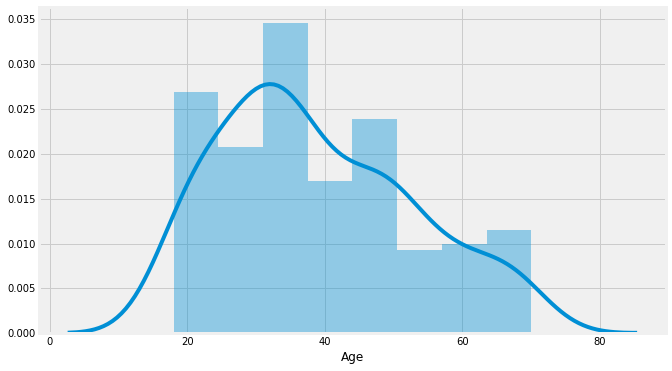

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data['Age'], ax=ax)

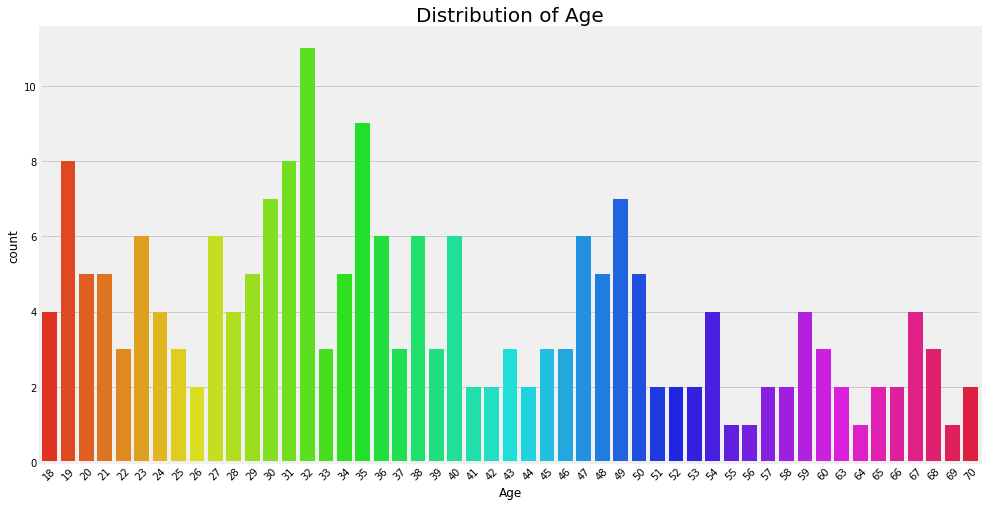

In [8]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.xticks(rotation=45)
plt.show()

#### Gender

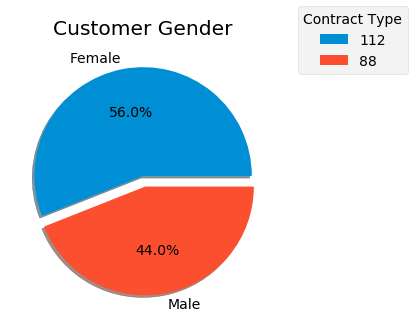

In [9]:
plt.rcParams.update({'font.size': 14})
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
fig=plt.gcf()
fig.set_size_inches(5,5)


plt.title('Customer Gender')
plt.axis('off')
plt.legend(data['Gender'].value_counts(), title='Contract Type', loc='center right',  bbox_to_anchor=(1, 0, 0.5, 2))
plt.show()

#### Annual Income

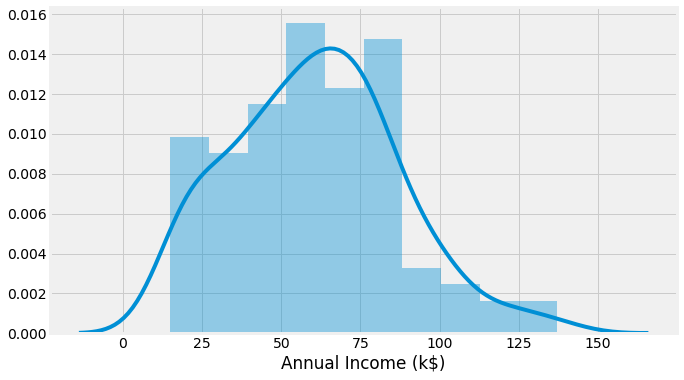

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data['Annual Income (k$)'], ax=ax)

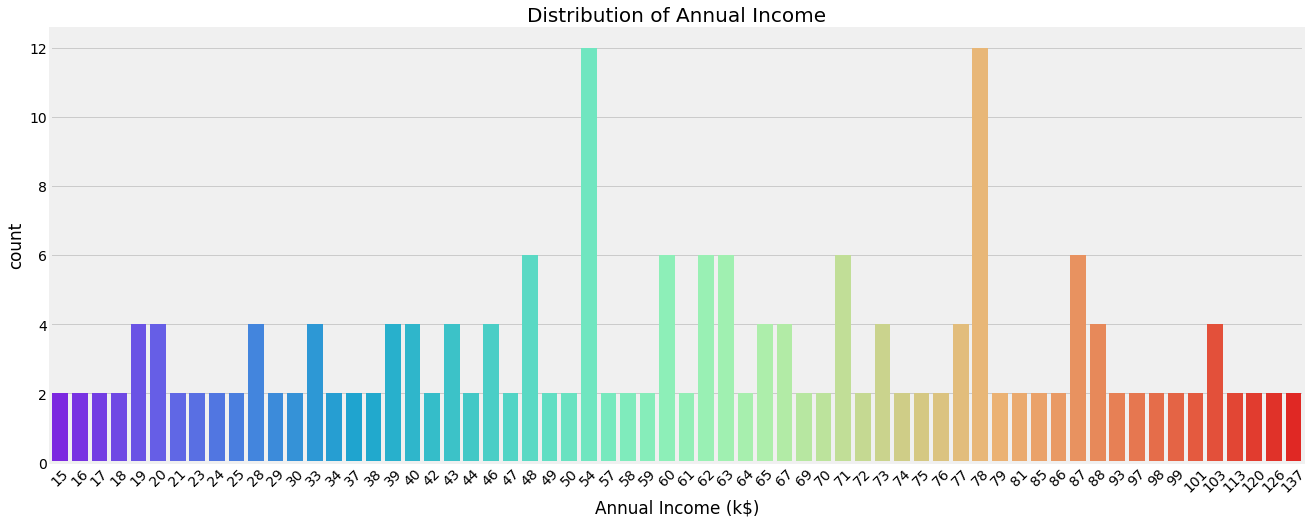

In [11]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xticks(rotation=45)
plt.show()

#### Spending Score

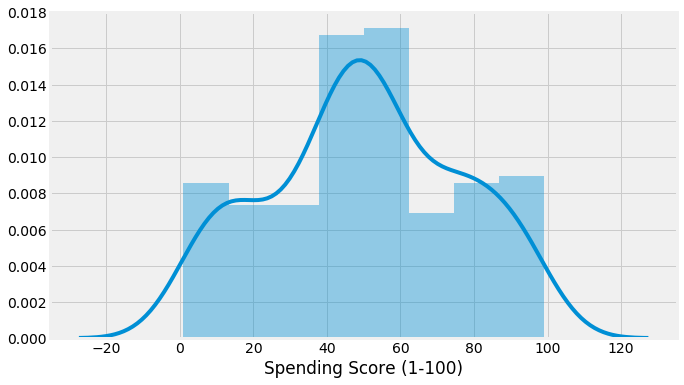

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data['Spending Score (1-100)'], ax=ax)

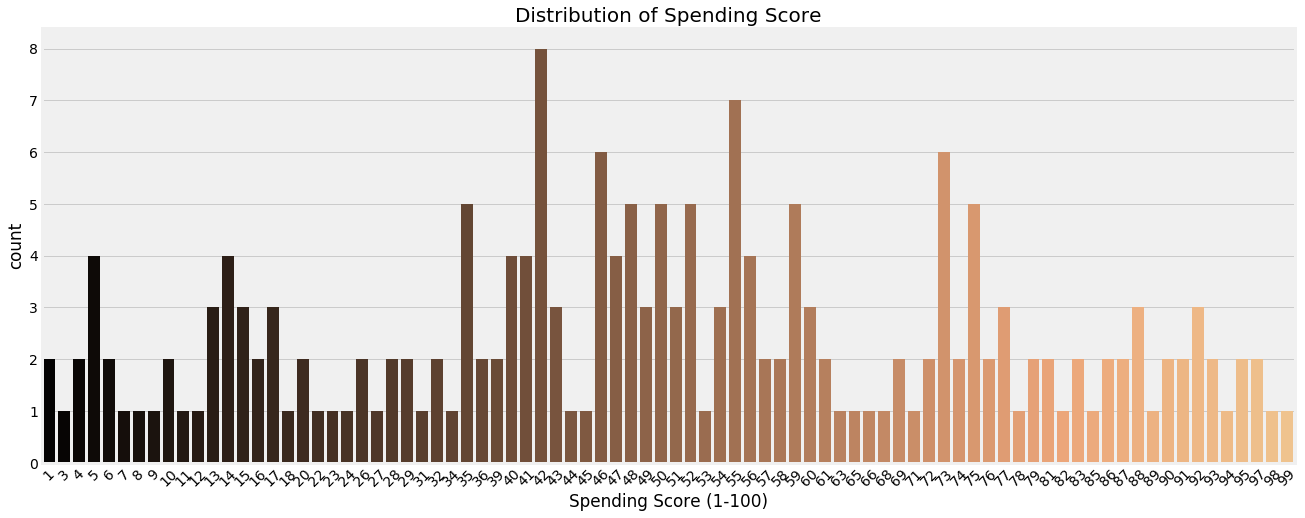

In [13]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.xticks(rotation=45)
plt.show()

#### Age vs Gender

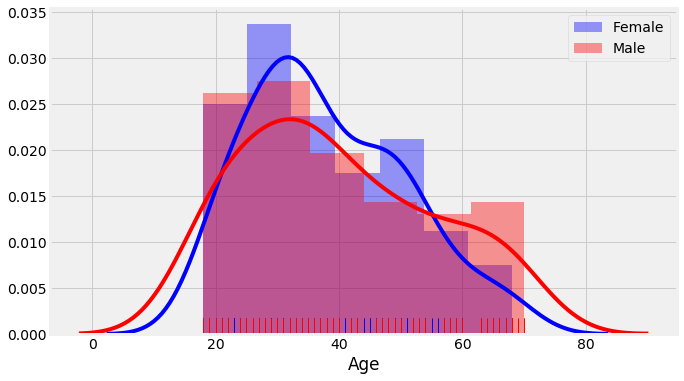

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
#sns.distplot(stratified_sample['amt_credit'], ax=ax)
sns.distplot(data[data['Gender']=='Female']["Age"], color='b', rug=True,label="Female")
sns.distplot(data[data['Gender']=='Male']["Age"], color='r', rug=True,label="Male")
plt.legend()
plt.show()

#### Andrews Curve

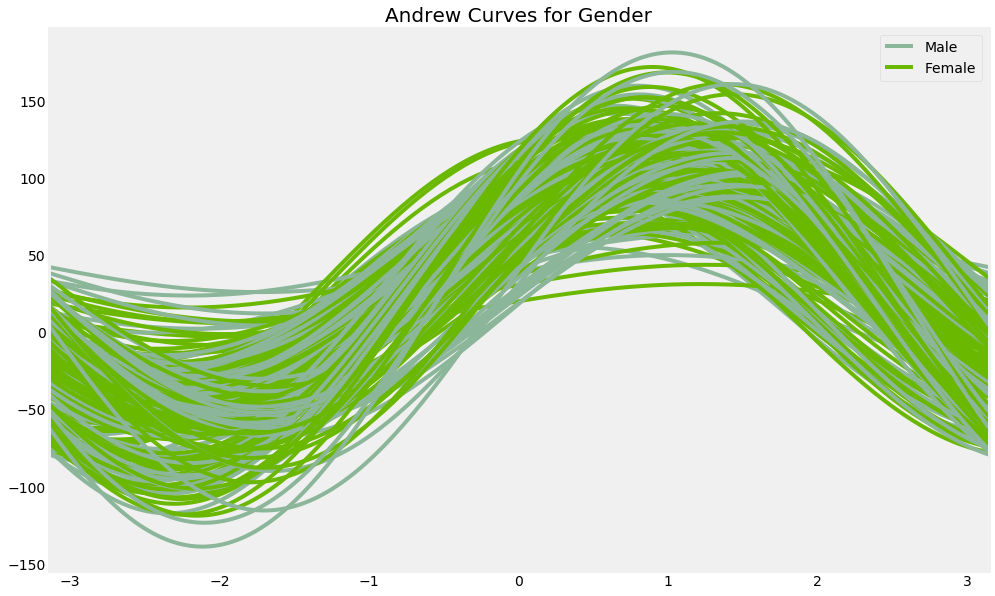

In [15]:
plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")     # kolom
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

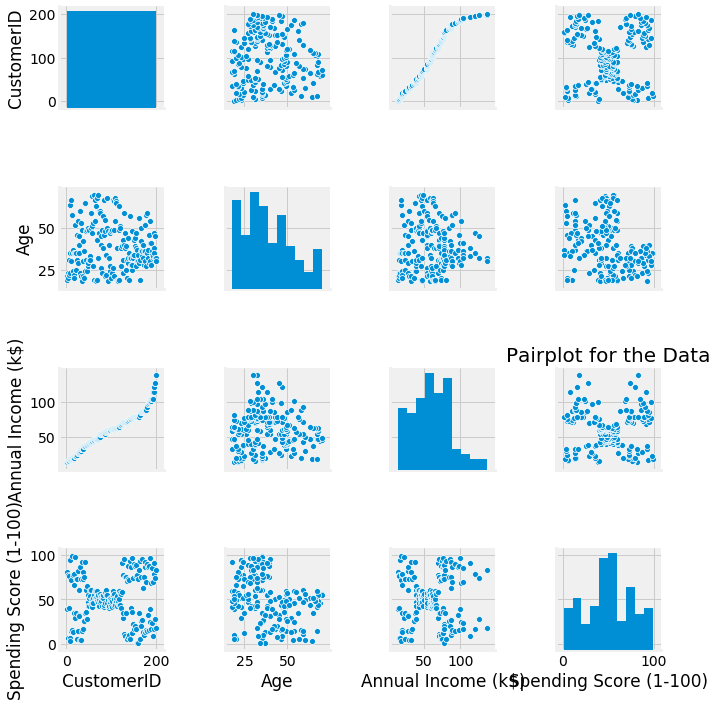

In [16]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

In [ ]:
from sklearn.datasets import make_blobs


### Correlations

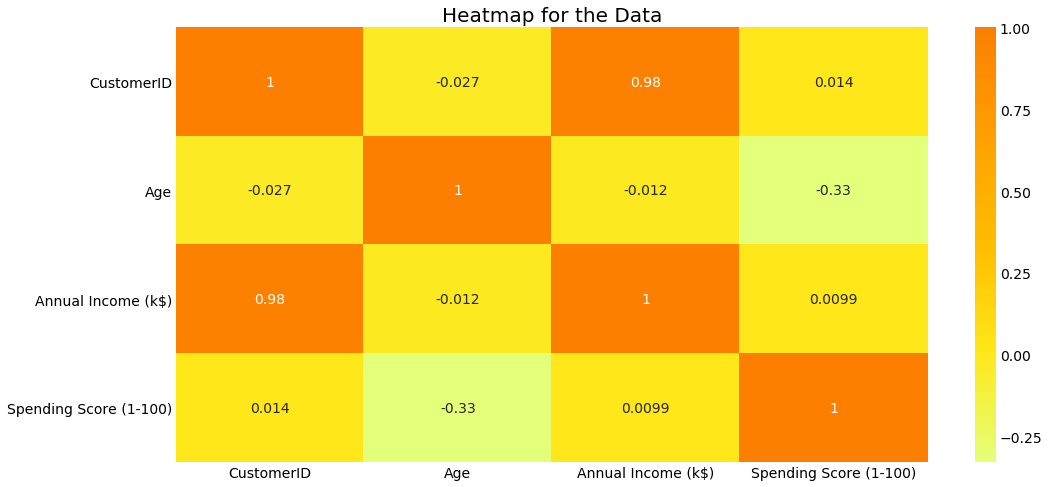

In [17]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

## Clustering with DBSCAN

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
## Get Data
X=data.iloc[:,[3,4]].values   # ambil data row ke-3 dan ke-4, dan convert ke numpy

### Apply DBSCAN Method

In [42]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=6, min_samples=4)   ## menggunakan epsilon(jari2 lingkaran) bernilai 3 dan minimal sample data point yaitu 4

### Fitting Model

In [43]:
model = dbscan.fit(X)
labels=model.labels_            ## create model (NOTE: -1 merupakan noise, dan cluster dimulai dari 0 keatas)

### Identifikasi point yang membuat CORE POINTS

In [44]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  5,  3,  5,  3,  4,  3,  4,  3,  5,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  5,  3,  4,  3,  5,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  5,  3,  4,  3, -1, -1,  6,  3, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6,  7, -1,  7,  6,  7, -1, -1, -1,
       -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [45]:
from sklearn import metrics
sample_cores = np.zeros_like(labels, dtype=bool)    ## create array dengan nilai 0(type: bool) yang berarti false semuadbscan.core_sample
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [46]:
dbscan.core_sample_indices_            ## index dengan cluster ke-0

array([  1,   3,   5,   9,  13,  15,  21,  26,  31,  43,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 125, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 161, 162, 163, 170, 172, 174, 176, 178, 183], dtype=int64)

In [47]:
## gabungan antara grup cluster ke-0 dan np.zeros (create numpy dengan nilai 0 semua)
sample_cores[dbscan.core_sample_indices_ ]=True         ## hanya grup cluster ke-0 saja

### Number of Cluster

In [49]:
## Jumlah cluster dengan tidak melibatkan grup ke:-1 (Noisy)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_            ## grup cluster dari 0 s/d 7

8

### Total Noisy

In [50]:
n_noise_ = list(labels).count(-1)
n_noise_

54

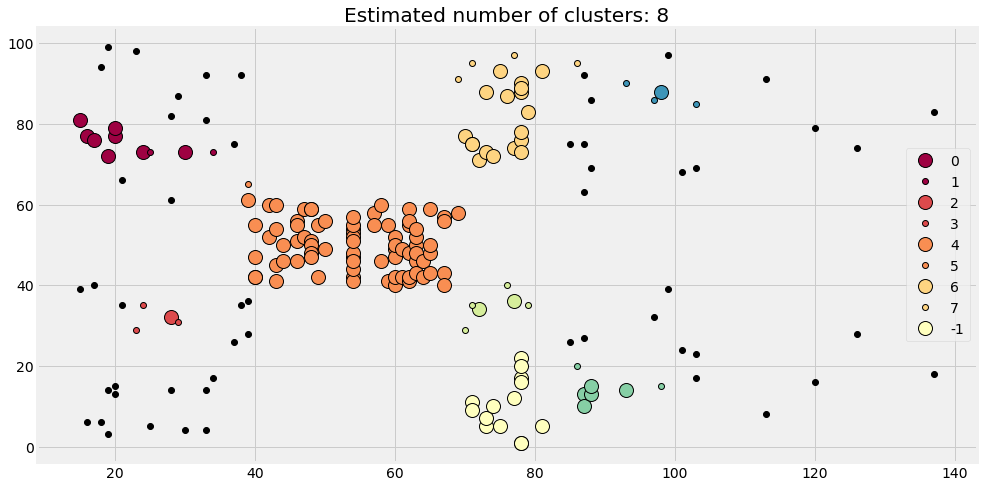

In [54]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.legend(set(labels))
plt.show()

In [55]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 8
Estimated number of noise points: 54
Silhouette Coefficient: 0.151
